In [4]:
import sys
sys.path.insert(0, '../../utils')
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
import Fidelity_Measure as fm
import Purity_Measure as PM
import os

In [5]:

# model driven read
# print(os.getcwd())
fm_list, fm_av, model_dms, params_list, plist, pmean = pd.read_pickle('../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_plist_pmean_alpha_HS_Haar_eta_vary.pickle')
fm_list_b, fm_av_b, model_dms_b, params_list_b, plist_b, pmean_b = pd.read_pickle('../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_plist_pmean_alpha_Brian_25_eta_vary.pickle')
fm_list_ma, fm_av_ma, model_dms_ma, params_list_ma, plist_ma, pmean_ma = pd.read_pickle('../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_plist_pmean_alpha_0.8_eta_vary.pickle')

mle_fids_list, mle_av, dm_target, dm_fitted = pd.read_pickle('../../mle_outputs/convoluted_mle_fids_list_fids_mean_shots_1024.pickle')


fm_array = np.array(fm_list)

print(fm_array.shape)
fm_std = fm_array.std(axis=1)
fm_av = np.array(fm_av)

p_array = np.array(plist)
print(p_array.shape)
p_std = p_array.std(axis=1)
p_mean = np.array(pmean)

p_array_b = np.array(plist_b)
print(p_array_b.shape)
p_std_b = p_array_b.std(axis=1)
p_mean_b = np.array(pmean_b)

p_array_ma = np.array(plist_ma)
print(p_array_ma.shape)
p_std_ma = p_array_ma.std(axis=1)
p_mean_ma = np.array(pmean_ma)

eta = [0.0008, 0.002, 0.004, 0.006, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]
print(eta[5])

eta = np.array(eta)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# x, y = np.meshgrid(eta, pmean)
# ax.plot_surface(x,y,fm_array)
# plt.show()


tparray = PM.purity(dm_target)
print(tparray.shape)
tpmean = np.repeat(np.mean(tparray), 8)
tpstd = np.repeat(np.std(tparray), 8)

(12, 200)
(12, 200)
(8, 200)
(8, 200)
0.01
(200,)


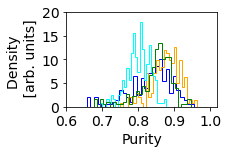

In [6]:

fs = 14
plt.hist(p_array[4].flatten(), 30, density=True, histtype='step', alpha=1, color='b', label=r'NN (HS-Haar) at $\eta=0.008$')
plt.hist(p_array_b[4].flatten(), 30, density=True, histtype='step', alpha=1, color='orange', label=r'NN (Z) at $\eta=0.008$')
plt.hist(p_array_ma[4].flatten(), 30, density=True, histtype='step', alpha=1, color='cyan', label=r'NN (MA) at $\eta=0.008$')
plt.hist(tparray.flatten(), 30, density=True, histtype='step', alpha=1, color='g', label=f'IBMQ')
plt.xlabel('Purity', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Density \n [arb. units]', fontsize=fs)
plt.axis([0.6, 1.02, 0, 20])
# plt.legend(fontsize='small')
# plt.title(r'$\eta=0.008$')
# plt.grid(alpha=0.2)
plt.subplots_adjust(bottom=0.55, left=0.55)
# plt.savefig('histo_purity_eta_0.008.svg', dpi=600)
# plt.savefig('histo_alpha.png', dpi=600)
plt.show()